In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px 

In [55]:
#Dataset limpio
wine = pd.read_csv('winequality_clean.csv')

Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
        - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

In [56]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.009734,0.313649,0.317829,5.186632,0.050949,29.893249,115.427350,0.994685,3.213734,0.516885,10.490004,5.763113
std,0.878065,0.120190,0.106051,4.307623,0.018101,16.272485,55.909441,0.002935,0.151349,0.118051,1.189748,0.757416
min,4.500000,0.080000,0.040000,0.600000,0.009000,1.000000,6.000000,0.987110,2.800000,0.220000,8.000000,4.000000
25%,6.400000,0.230000,0.260000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.311648,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.500000,0.370000,0.380000,7.800000,0.059000,41.000000,155.000000,0.996990,3.320000,0.590000,11.300000,6.000000
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.003690,3.630000,0.850000,14.000000,7.000000


In [57]:
wines_n = wine.loc[:,['fixed acidity', 'volatile acidity','pH', 'alcohol', 'density']].copy()
# Correlacion

correlacion = wines_n.corr()
correlacion


,fixed acidity,volatile acidity,pH,alcohol,density
fixed acidity,1.000000,0.146988,-0.210268,-0.137607,0.354978
volatile acidity,0.146988,1.000000,0.176798,-0.015431,0.236275
pH,-0.210268,0.176798,1.000000,0.107260,0.015587
alcohol,-0.137607,-0.015431,0.107260,1.000000,-0.702234
density,0.354978,0.236275,0.015587,-0.702234,1.000000


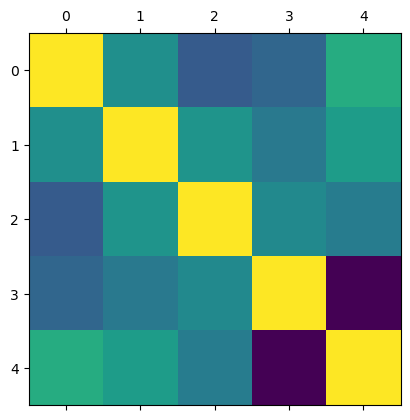

In [58]:
plt.matshow(correlacion) 

In [59]:
# Implementacion de PCA
cols_to_use = ['fixed acidity', 'volatile acidity','pH', 'alcohol', 'density']

In [60]:
x = wine.loc[:, cols_to_use].values
x

array([[ 7.     ,  0.27   ,  3.     ,  8.8    ,  1.001  ],
       [ 6.3    ,  0.3    ,  3.3    ,  9.5    ,  0.994  ],
       [ 8.1    ,  0.28   ,  3.26   , 10.1    ,  0.9951 ],
       ...,
       [ 6.3    ,  0.51   ,  3.42   , 11.     ,  0.99574],
       [ 5.9    ,  0.645  ,  3.57   , 10.2    ,  0.99547],
       [ 6.     ,  0.31   ,  3.39   , 11.     ,  0.99549]])

In [61]:
x = StandardScaler().fit_transform(x)
x

array([[-0.01108707, -0.36319143, -1.41229747, -1.42058099,  2.15167442],
       [-0.80835621, -0.11356747,  0.57002498, -0.83217593, -0.23340129],
       [ 1.24176445, -0.27998344,  0.30571532, -0.32782874,  0.14139632],
       ...,
       [-0.80835621,  1.63380029,  1.36295396,  0.42869204,  0.35946038],
       [-1.26393858,  2.75710814,  2.35411518, -0.24377088,  0.26746461],
       [-1.15004299, -0.03035948,  1.16472171,  0.42869204,  0.27427911]])

In [62]:
x = np.around(x, 2)

In [63]:
np.nan_to_num(x)

array([[-0.01, -0.36, -1.41, -1.42,  2.15],
       [-0.81, -0.11,  0.57, -0.83, -0.23],
       [ 1.24, -0.28,  0.31, -0.33,  0.14],
       ...,
       [-0.81,  1.63,  1.36,  0.43,  0.36],
       [-1.26,  2.76,  2.35, -0.24,  0.27],
       [-1.15, -0.03,  1.16,  0.43,  0.27]])

In [64]:
pca = PCA(n_components=2)

In [65]:
principalComponents = pca.fit_transform(x)

In [66]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) 

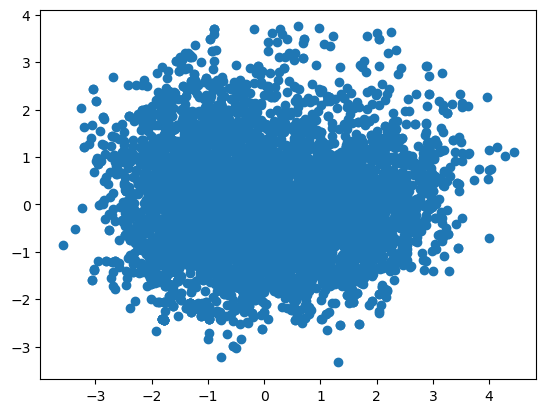

In [67]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )

In [68]:
# aplique un algoritmo de k-means para crear tres perfiles del vino
kmeans = KMeans(n_clusters=3).fit(pcadf)

In [69]:
kmeans.cluster_centers_

array([[-0.90441612,  1.25336347],
       [-0.83933246, -0.7457106 ],
       [ 1.47333584, -0.06141423]])

In [70]:
centroids = kmeans.cluster_centers_


In [71]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 2])

In [72]:
pcadf

,c1,c2
0,-2.311432,-1.168753
1,0.080666,0.417446
2,-0.689844,-0.191424
3,-0.444718,-0.601885
4,-0.444718,-0.601885
...,...,...
6492,-0.036881,2.817914
6493,0.532585,3.041954
6494,0.119197,2.257861
6495,-0.178382,3.710895


In [73]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,5.444326,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0
1,white,6.3,0.300,0.34,1.600000,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0
2,white,8.1,0.280,0.40,6.900000,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0
3,white,7.2,0.230,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
4,white,7.2,0.230,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.000000,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0
6493,red,5.9,0.550,0.10,2.200000,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0
6494,red,6.3,0.510,0.13,2.300000,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0
6495,red,5.9,0.645,0.12,2.000000,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0


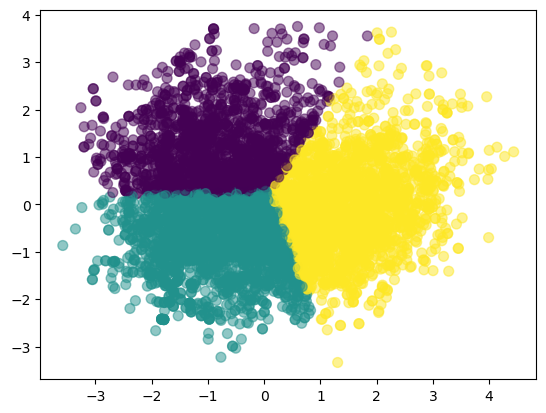

In [74]:
plt.scatter(pcadf['c1'], pcadf['c2'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)

In [75]:
wines_n['cluster'] = kmeans.labels_

In [76]:
wines_n

,fixed acidity,volatile acidity,pH,alcohol,density,cluster
0,7.0,0.270,3.00,8.8,1.00100,1
1,6.3,0.300,3.30,9.5,0.99400,0
2,8.1,0.280,3.26,10.1,0.99510,1
3,7.2,0.230,3.19,9.9,0.99560,1
4,7.2,0.230,3.19,9.9,0.99560,1
...,...,...,...,...,...,...
6492,6.2,0.600,3.45,10.5,0.99490,0
6493,5.9,0.550,3.52,11.2,0.99512,0
6494,6.3,0.510,3.42,11.0,0.99574,0
6495,5.9,0.645,3.57,10.2,0.99547,0


In [77]:
# vino con mayor acidez, menor alcohol y  densidad
wines_n.loc[wines_n['cluster'] == 0, :].describe()

,fixed acidity,volatile acidity,pH,alcohol,density,cluster
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,7.247881,0.440650,3.336340,10.117412,0.996742,0.0
std,0.838475,0.124432,0.122182,0.853150,0.001811,0.0
min,5.000000,0.105000,2.920000,8.000000,0.990900,0.0
25%,6.700000,0.331546,3.250000,9.500000,0.995545,0.0
50%,7.135143,0.430000,3.340000,9.900000,0.996700,0.0
75%,7.700000,0.550000,3.420000,10.700000,0.997810,0.0
max,9.600000,0.655000,3.630000,13.400000,1.003690,0.0


In [78]:
# vino con menor acidez, mayor alcohol y densidad
wines_n.loc[wines_n['cluster'] == 1, :].describe()

,fixed acidity,volatile acidity,pH,alcohol,density,cluster
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0
mean,7.312080,0.272934,3.119426,9.727270,0.996167,1.0
std,0.826093,0.078526,0.110270,0.751529,0.002157,0.0
min,4.900000,0.090000,2.800000,8.400000,0.990380,1.0
25%,6.700000,0.220000,3.050000,9.200000,0.994600,1.0
50%,7.200000,0.270000,3.120000,9.500000,0.996100,1.0
75%,7.800000,0.320000,3.190000,10.200000,0.997820,1.0
max,9.600000,0.655000,3.470000,13.200000,1.003200,1.0


In [79]:
# vino con acidez intermedia, alcohol y densidad intermedia
wines_n.loc[wines_n['cluster'] == 2, :].describe()

,fixed acidity,volatile acidity,pH,alcohol,density,cluster
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.0
mean,6.535731,0.271409,3.230298,11.533627,0.991769,2.0
std,0.742520,0.090134,0.140963,0.986427,0.001641,0.0
min,4.500000,0.080000,2.800000,8.000000,0.987110,2.0
25%,6.000000,0.200000,3.140000,10.800000,0.990600,2.0
50%,6.500000,0.260000,3.220000,11.500000,0.991700,2.0
75%,7.000000,0.320000,3.320000,12.300000,0.992888,2.0
max,9.400000,0.650000,3.630000,14.000000,0.997600,2.0


Que significa cada cluster (Perfil del vino)
- Cluster 0:Caracteristicas del vino con mayor acidez, menor alcohol y  densidad
- Cluster 1: Caracteristicas del vino con menor acidez, mayor alcohol y densidad
- Cluster 2: Caracteristicas del vino con acidez intermedia, alcohol y densidad intermedia

In [ ]:
# sse = {}
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=kmeans, max_iter=1000).fit(pcadf)
#     sse[kmeans] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of cluster")
# plt.ylabel("SSE")
# plt.show()


In [81]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [82]:
loadings

array([[-0.55922807, -0.21272804],
       [-0.31073356,  0.67383302],
       [ 0.14735145,  0.82980452],
       [ 0.80667715,  0.10021397],
       [-0.91324233,  0.12340008]])

In [83]:
fig = px.scatter(principalComponents, x=0, y=1, color=wines_n['cluster'])

In [84]:

for i, feature in enumerate(cols_to_use):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [85]:
#Add column 'cluster to original DataFrame'
wine['cluster'] = wines_n['cluster']
wine


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,white,7.0,0.270,0.36,5.444326,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0,1
1,white,6.3,0.300,0.34,1.600000,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0,0
2,white,8.1,0.280,0.40,6.900000,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0,1
3,white,7.2,0.230,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0,1
4,white,7.2,0.230,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.000000,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0,0
6493,red,5.9,0.550,0.10,2.200000,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0,0
6494,red,6.3,0.510,0.13,2.300000,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0,0
6495,red,5.9,0.645,0.12,2.000000,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0,0


In [86]:
# Eliminar columnas que formaron parte del PCA
wine = wine.drop(['fixed acidity', 'volatile acidity','pH', 'alcohol', 'density'], axis=1)
wine

,type,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,quality,cluster
0,white,0.36,5.444326,0.045,45.0,170.0,0.450000,6.0,1
1,white,0.34,1.600000,0.049,14.0,132.0,0.490000,6.0,0
2,white,0.40,6.900000,0.050,30.0,97.0,0.440000,6.0,1
3,white,0.32,8.500000,0.058,47.0,186.0,0.400000,6.0,1
4,white,0.32,8.500000,0.058,47.0,186.0,0.400000,6.0,1
...,...,...,...,...,...,...,...,...,...
6492,red,0.08,2.000000,0.090,32.0,44.0,0.580000,5.0,0
6493,red,0.10,2.200000,0.062,39.0,51.0,0.531215,6.0,0
6494,red,0.13,2.300000,0.076,29.0,40.0,0.750000,6.0,0
6495,red,0.12,2.000000,0.075,32.0,44.0,0.710000,5.0,0


In [87]:
#Crea la varible de respuesta de la siguiente manera: if quality >= 5 ? 1 else 0
wine['quality'] = np.where(wine['quality'] >= 5, 1, 0)


In [91]:
# Elimine la variable quality del dataset
wine = wine.drop(['quality'], axis=1)
wine



,type,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,cluster
0,white,0.36,5.444326,0.045,45.0,170.0,0.450000,1
1,white,0.34,1.600000,0.049,14.0,132.0,0.490000,0
2,white,0.40,6.900000,0.050,30.0,97.0,0.440000,1
3,white,0.32,8.500000,0.058,47.0,186.0,0.400000,1
4,white,0.32,8.500000,0.058,47.0,186.0,0.400000,1
...,...,...,...,...,...,...,...,...
6492,red,0.08,2.000000,0.090,32.0,44.0,0.580000,0
6493,red,0.10,2.200000,0.062,39.0,51.0,0.531215,0
6494,red,0.13,2.300000,0.076,29.0,40.0,0.750000,0
6495,red,0.12,2.000000,0.075,32.0,44.0,0.710000,0


In [101]:
#Aplique los siguientes entrenamientos al dataset wine de MLS: regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Separe el dataset en train y test
X = wines_n.drop(['cluster'], axis=1)
y = wines_n['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Entrene el modelo
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Prediga el modelo
y_pred = logreg.predict(X_test)

#Evalúe el modelo
print('Accuracy regresion logistica {:.2f}'.format(logreg.score(X_test, y_test)))

#Matriz de confusión
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#Reporte de clasificación
print(classification_report(y_test, y_pred))




Accuracy regresion logistica 0.90
[[282  28  29]
 [  3 457  34]
 [ 15  21 431]]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       339
           1       0.90      0.93      0.91       494
           2       0.87      0.92      0.90       467

    accuracy                           0.90      1300
   macro avg       0.91      0.89      0.90      1300
weighted avg       0.90      0.90      0.90      1300



c:\Users\Angel\.conda\envs\ia\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [102]:
#Aplique los siguientes entrenamientos al dataset wine de MLS: árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Separe el dataset en train y test
X = wines_n.drop(['cluster'], axis=1)
y = wines_n['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Entrene el modelo
clf = DecisionTreeClassifier().fit(X_train, y_train)

#Prediga el modelo
y_pred = clf.predict(X_test)

#Evalúe el modelo
print('Accuracy Arbol de desicion: {:.2f}'.format(clf.score(X_test, y_test)))



#Reporte de clasificación
print(classification_report(y_test, y_pred))



Accuracy Arbol de desicion: 0.94
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       339
           1       0.96      0.94      0.95       494
           2       0.94      0.96      0.95       467

    accuracy                           0.94      1300
   macro avg       0.94      0.94      0.94      1300
weighted avg       0.94      0.94      0.94      1300



In [103]:
#Aplique los siguientes entrenamientos al dataset wine de MLS: random forest
from sklearn.ensemble import RandomForestClassifier

#Separe el dataset en train y test
X = wines_n.drop(['cluster'], axis=1)
y = wines_n['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Entrene el modelo
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

#Prediga el modelo
y_pred = clf.predict(X_test)

#Evalúe el modelo
print('Accuracy random forest {:.2f}'.format(clf.score(X_test, y_test)))



#Reporte de clasificación
print(classification_report(y_test, y_pred))

Accuracy random forest 0.83
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       339
           1       0.79      0.84      0.81       494
           2       0.90      0.87      0.89       467

    accuracy                           0.83      1300
   macro avg       0.82      0.82      0.82      1300
weighted avg       0.83      0.83      0.83      1300



In [104]:
# Aplique los siguientes entrenamientos al dataset wine de MLS: NN
from sklearn.neural_network import MLPClassifier

#Separe el dataset en train y test
X = wines_n.drop(['cluster'], axis=1)
y = wines_n['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Entrene el modelo
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

#Prediga el modelo
y_pred = clf.predict(X_test)

#Evalúe el modelo
print('Accuracy NN {:.2f}'.format(clf.score(X_test, y_test)))

#Reporte de clasificación
print(classification_report(y_test, y_pred))


Accuracy NN 0.89
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       339
           1       0.87      0.94      0.91       494
           2       0.89      0.89      0.89       467

    accuracy                           0.89      1300
   macro avg       0.90      0.89      0.89      1300
weighted avg       0.90      0.89      0.89      1300



Explique cual de los modelos es el mejor para este dataset y por qué
- El mejor modelo es el de arbol de desicion, ya que tiene un mejor accuracy (0.94) en las predicciones correctas sobre la probabilidad de que el vino sea de calidad 5 o superior.